In [1]:
#Import libraries
from matplotlib_venn import venn3, venn3_circles
# from matplotlib import pyplot as plt
import pylab as plt
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
diff_df = pd.read_csv('/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.diff_efficiency_by_cell_line.tsv',
                     sep='\t')
neuroseq_donor_set = set(diff_df['donor_id'].tolist())

print(len(neuroseq_donor_set))

199


In [4]:
#t_file = '/nfs/leia/research/stegle/dseaton/hipsci/proteomics_analysis/data/analysis/IPSc.ISR.featureCounts.genes.counts.unique.stranded.tsv_counts.HQ_TMM_TPM.tsv.gz'
t_file = '/hps/nobackup/hipsci/scratch/trans_eqtls/IPS_Bulk-RNA_Processing/Merged/IPS_Bulk-RNA_Processing/FullFreeze_Corrected_iPSC_20180506.txt.gz'

t_df = pd.read_csv(t_file,
                  sep='\t', index_col=0)

t_df.columns = [x.replace('i.','i-').replace('.hs37d5','') for x in t_df.columns]

t_df = t_df.loc[:, [x.startswith('HPSI') for x in t_df.columns]]
t_df = t_df[t_df.mean(axis=1)>2.0]

print(t_df.shape)

bulk_donor_set = set(t_df.columns)
print(len(bulk_donor_set))

t_df.head()

(15456, 815)
815


,HPSI0114i-bezi_1,HPSI0114i-bezi_3,HPSI0114i-eipl_1,HPSI0114i-eipl_3,HPSI0114i-fikt_3,HPSI0114i-iisa_1,HPSI0114i-iisa_3,HPSI0114i-joxm_1,HPSI0114i-kolf_2,HPSI0114i-kolf_3,...,HPSI1213i-babk_2,HPSI1213i-foqj_2,HPSI1213i-hehd_1,HPSI1213i-hehd_2,HPSI1213i-nekd_1,HPSI1213i-pahc_4,HPSI1213i-pahc_5,HPSI1213i-tolg_4,HPSI1213i-tolg_6,HPSI1213i-xuja_2
ENSG00000227232,5.949736,5.804228,5.998296,6.103528,5.313150,5.367878,5.645318,5.997725,5.633292,6.273985,...,5.757756,6.030894,5.526627,5.627544,5.806231,6.285153,5.779463,5.313008,5.632988,6.268481
ENSG00000237683,4.306061,4.761132,5.269492,5.226469,4.602607,4.579685,4.921617,5.189938,5.481510,5.181876,...,4.605153,5.475678,4.386556,5.039847,5.455942,5.497346,4.544433,4.514377,5.182108,5.032693
ENSG00000239906,3.440319,4.335320,4.907799,5.258379,3.995890,4.657899,5.363874,4.158991,4.831910,5.100670,...,4.207819,5.212017,4.277409,5.061932,5.800246,5.866232,4.770117,4.493827,6.102605,4.447120
ENSG00000241860,1.845949,1.874849,2.453120,2.356231,1.928637,1.716941,1.898862,2.192841,2.360707,2.436328,...,1.758515,2.389833,1.973546,2.325539,2.229093,2.353388,1.600736,1.971813,2.494855,1.967695
ENSG00000237094,2.396015,2.512063,3.003918,2.808671,2.560465,2.590156,2.923498,2.891094,3.089073,3.233248,...,2.621237,2.990237,2.349560,2.705635,2.828586,3.426813,2.852307,2.730802,3.041198,3.045552


In [5]:
sc_metadata_file = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_endodiff/data/sce_merged_afterqc_filt_allexpts_metadata_20180618.tsv'

sc_df = pd.read_csv(sc_metadata_file, sep='\t')

sc_df = sc_df.query('day=="day0"')

sc_donor_set = set(sc_df['donor_long_id'].drop_duplicates().tolist())

print(len(sc_donor_set))

sc_df.head()

112


,adj_x,adj_y,assigned,auxDir,cell_filter,cell_name,compatible_fragment_ratio,day,diff_population,donor,...,donor_short_id,donor_long_id,pseudo,PC1_top100hvgs,PC1_top200hvgs,PC1_top500hvgs,PC1_top1000hvgs,PC1_top2000hvgs,princ_curve,princ_curve_scaled01
21672_1#101,2191.0,5643.0,1,aux_info,True,21672_1#101,0.999627,day0,Tra160-CXCR4-,zapk,...,zapk_3,HPSI0114i-zapk_3,0.068972,-21.207724,-23.826919,-29.835256,-31.175576,-33.669350,9.748962,0.085989
21672_1#102,2642.0,5643.0,1,aux_info,True,21672_1#102,0.999575,day0,Tra160-CXCR4-,wibj,...,wibj_2,HPSI0214i-wibj_2,0.079640,-19.563645,-23.096430,-27.557992,-30.734415,-35.417979,11.766061,0.103780
21672_1#103,3092.0,5643.0,1,aux_info,True,21672_1#103,0.999261,day0,Tra160+CXCR4-,jogf,...,jogf_2,HPSI1013i-jogf_2,0.109625,-20.074476,-23.449559,-27.830824,-31.306384,-35.307444,15.259212,0.134591
21672_1#104,3542.0,5643.0,1,aux_info,True,21672_1#104,0.999625,day0,Tra160+CXCR4-,jogf,...,jogf_2,HPSI1013i-jogf_2,0.103077,-19.979735,-23.879283,-26.676020,-31.077198,-34.488644,15.187813,0.133961
21672_1#105,3992.0,5643.0,1,aux_info,True,21672_1#105,0.999494,day0,Tra160-CXCR4-,pelm,...,pelm_3,HPSI0214i-pelm_3,0.164228,-16.752287,-19.461768,-23.946509,-25.386559,-29.081668,14.656829,0.129278


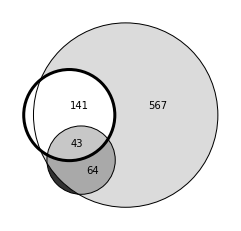

In [7]:
set_labels = ['',
              '',
              ''
              ]
v = venn3([neuroseq_donor_set, bulk_donor_set,sc_donor_set],
                     set_labels = set_labels, set_colors=('white','lightgrey','black'), alpha = 0.8)
v.get_label_by_id('100').set_text('')
v.get_label_by_id('001').set_text('')
c=venn3_circles([neuroseq_donor_set, bulk_donor_set,sc_donor_set], linewidth=1)
c[0].set_lw(3)
# c[0].set_ls('dotted')
# c[0].set_color('skyblue')
fig_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/figures/main_figures/"

# plt.show()
plt.savefig(fig_folder+"Fig_3a.pdf", dpi=300)